In [15]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [16]:
def plotDataset(dataset):
    x0 = []
    y0 = []
    x1 =[]
    y1 =[]    
    for i in range(dataset[0].shape[0]):
        if dataset[1][i] == 0:
            x0.append(dataset[0][i][0])
            y0.append(dataset[0][i][1])
        if dataset[1][i] == 1:
            x1.append(dataset[0][i][0])
            y1.append(dataset[0][i][1])
    plt.plot(x0, y0, 'o', color='red')
    plt.plot(x1, y1, 'o', color='blue')

In [22]:
classfiers = {
        "KNN": KNeighborsClassifier(3),
        "DTC": DecisionTreeClassifier(max_depth=5),
        "RFC": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)}
calib = list(map(lambda item: (item[0], CalibratedClassifierCV(item[1])), classfiers.items()))

In [23]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=2, n_clusters_per_class=1,
                           n_samples=10000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

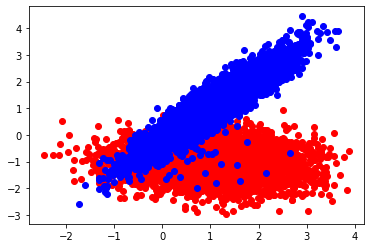

In [19]:
%matplotlib inline
plotDataset((X,y))

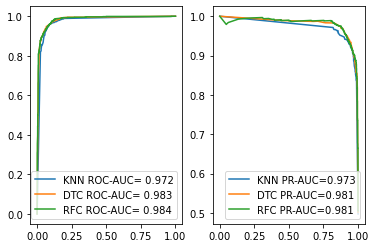

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2)
for classifier in calib:
    model = classifier[1]
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)
    auc = metrics.auc(fpr, tpr)
    precision, recall, _ = metrics.precision_recall_curve(y_test, y_prob)
    auc_pr = metrics.auc(recall, precision)
    ax1.plot(fpr, tpr, label=classifier[0] + " ROC-AUC= " + str(round(auc, 3)))
    ax1.legend(loc=4)
    ax2.plot(recall, precision, label=classifier[0] + " PR-AUC=" + str(round(auc_pr, 3)))
    ax2.legend(loc=4)
    
plt.show()